## Introduction
<p><img src="https://assets.datacamp.com/production/project_1174/img/trendlines.jpg" alt="Image of two trendlines over time."></p>
<p>It’s important to stay informed about trends in programming languages and technologies. Knowing what languages are growing or shrinking can help you decide where to invest. </p>
<p>An excellent source to gain a better understanding of popular technologies is <a href="https://stackoverflow.com/">Stack Overflow</a>. Stack overflow is an online question-and-answer site for coding topics. By looking at the number of questions about each technology, you can get an idea of how many people are using it.</p>
<p>You'll be working with a dataset with one observation for each tag in each year. The dataset was downloaded from the <a href="https://data.stackexchange.com/">Stack Exchange Data Explorer</a>. Below you can find an overview of the data that is available to you:<br><br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/stack_overflow_data.csv</b></div>
<ul>
    <li><b>year:</b> The year the question was asked.</li>
    <li><b>tag:</b> A word or phrase that describes the topic of the question.</li>
    <li><b>number:</b> The number of questions with a certain tag in that year.</li>
    <li><b>year_total:</b> The total number of questions asked in that year.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/41">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around data manipulation and visualization in the Tidyverse and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/introduction-to-the-tidyverse">Introduction to the Tidyverse</a>.</em></p>

Parsed with column specification:
cols(
  year = col_double(),
  tag = col_character(),
  number = col_double(),
  year_total = col_double()
)


[1] 0.9656728
[1] "javascript" "python"     "java"       "android"    "c#"        


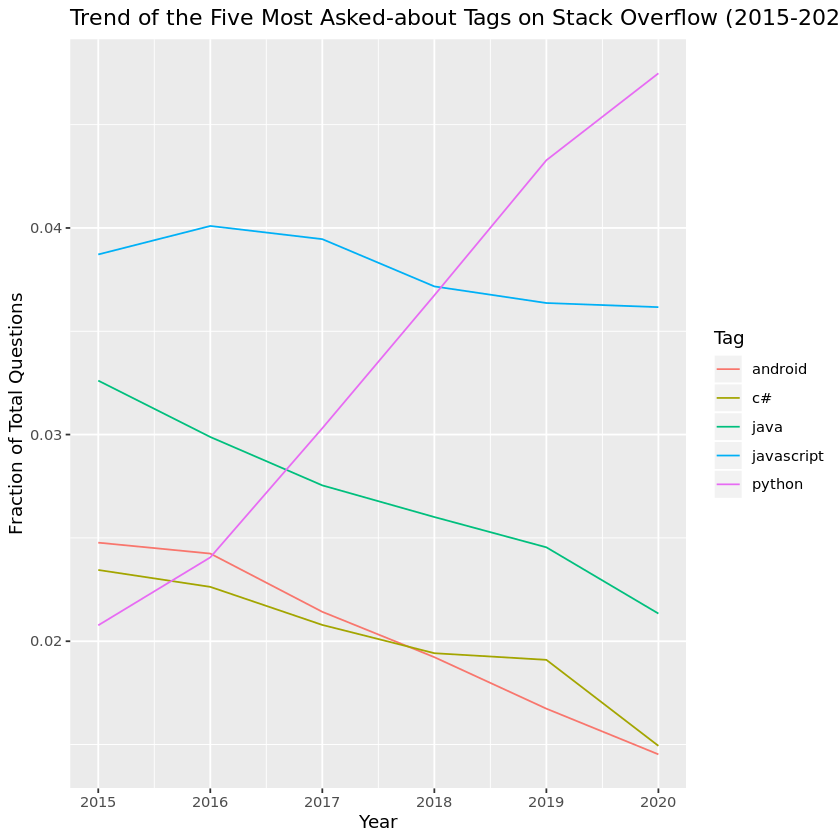

In [2]:
# Load the required packages
library(readr)
library(dplyr)
library(ggplot2)

# Load the dataset
stack_overflow_data <- read_csv("datasets/stack_overflow_data.csv")

# Add the fraction column
stack_overflow_data_fraction <- stack_overflow_data %>%
  mutate(fraction = number / year_total)

# Calculate the fraction of questions with the R tag in 2019
r_percentage <- stack_overflow_data_fraction %>%
  filter(tag == "r", year == 2019) %>%
  summarize(r_percentage = fraction * 100) %>%
  pull(r_percentage)

# Print the r_percentage
print(r_percentage)

# Determine the five most asked-about tags from 2015 to 2020
highest_tags <- stack_overflow_data_fraction %>%
  filter(year >= 2015 & year <= 2020) %>%
  group_by(tag) %>%
  summarize(total = sum(number)) %>%
  arrange(desc(total)) %>%
  slice(1:5) %>%
  pull(tag)

# Print the highest_tags
print(highest_tags)

# Filter the data for the highest tags
highest_tags_data <- stack_overflow_data_fraction %>%
  filter(tag %in% highest_tags, year >= 2015 & year <= 2020)

# Create the visualization
ggplot(highest_tags_data, aes(x = year, y = fraction, color = tag)) +
  geom_line() +
  labs(title = "Trend of the Five Most Asked-about Tags on Stack Overflow (2015-2020)",
       x = "Year",
       y = "Fraction of Total Questions",
       color = "Tag")
